In [25]:
!pip install tensorflow
!pip install opencv-python
!pip install kaggle
!pip install opendatasets

In [26]:
import tensorflow
from PIL import Image
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, save_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD,RMSprop,Adamax
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam,Adadelta,RMSprop,Adagrad
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau,EarlyStopping
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import numpy as np
import argparse
import cv2
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from tensorflow.keras.models import Model, Sequential
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
import scipy
import skimage
from skimage.transform import resize
import random
from PIL import Image
import glob
from tensorflow.keras.preprocessing.image import load_img, save_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD,RMSprop,Adamax
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam,Adadelta,RMSprop,Adagrad
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import numpy as np
import argparse
import cv2
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from tensorflow.keras.models import Model, Sequential
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
import scipy
import skimage
from skimage.transform import resize
import random
import os
import opendatasets as od
import pandas

In [27]:
od.download(
    "https://www.kaggle.com/datasets/sid321axn/covid-cxr-image-dataset-research")

Skipping, found downloaded files in ".\covid-cxr-image-dataset-research" (use force=True to force download)


In [28]:
download_path = os.path.abspath('covid-cxr-image-dataset-research')

In [29]:
def Images_details_Print_data(data, path):
    print(" ====== Images in: ", path)    
    for k, v in data.items():
        print("%s:\t%s" % (k, v))

def Images_details(path):
    files = [f for f in glob.glob(path + "**/*.*", recursive=True)]
    data = {}
    data['images_count'] = len(files)
    data['min_width'] = 10**100  # No image will be bigger than that
    data['max_width'] = 0
    data['min_height'] = 10**100  # No image will be bigger than that
    data['max_height'] = 0


    for f in files:
        im = Image.open(f)
        width, height = im.size
        data['min_width'] = min(width, data['min_width'])
        data['max_width'] = max(width, data['max_height'])
        data['min_height'] = min(height, data['min_height'])
        data['max_height'] = max(height, data['max_height'])

    Images_details_Print_data(data, path)

In [30]:
COV_DIR = download_path+"/COVID_IEEE/covid/"
NORM_DIR = download_path+"/COVID_IEEE/normal/"
VIR_DIR = download_path+"/COVID_IEEE/virus/"

In [31]:
Images_details(NORM_DIR)

 ====== Images in:  C:\Users\isabe\Downloads\covid-cxr-image-dataset-research/COVID_IEEE/normal/
images_count:	668
min_width:	1040
max_width:	2628
min_height:	650
max_height:	2628


In [32]:
Images_details(COV_DIR)

 ====== Images in:  C:\Users\isabe\Downloads\covid-cxr-image-dataset-research/COVID_IEEE/covid/
images_count:	536
min_width:	240
max_width:	4095
min_height:	237
max_height:	4095


In [33]:
Images_details(VIR_DIR)

 ====== Images in:  C:\Users\isabe\Downloads\covid-cxr-image-dataset-research/COVID_IEEE/virus/
images_count:	619
min_width:	384
max_width:	2304
min_height:	127
max_height:	2304


In [34]:
Cimages = os.listdir(COV_DIR)
Nimages = os.listdir(NORM_DIR)
Vimages = os.listdir(VIR_DIR)

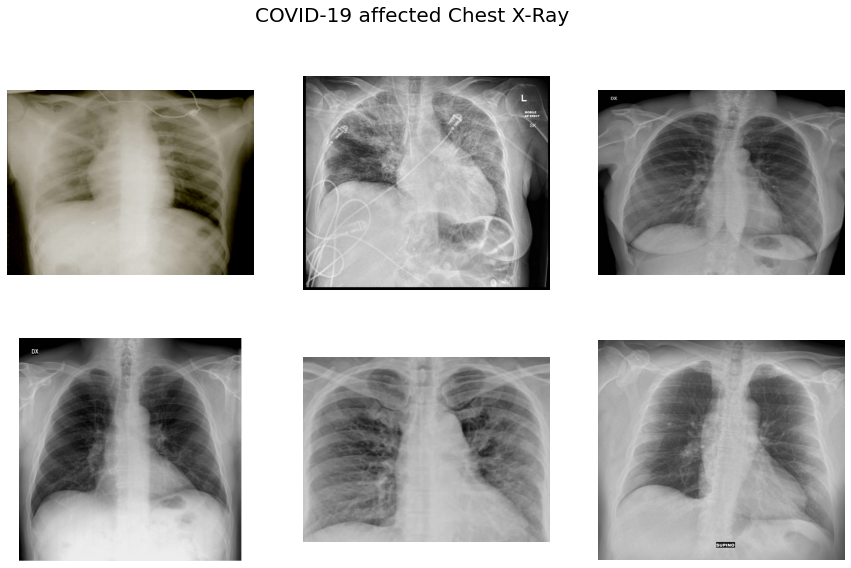

In [35]:
sample_images = random.sample(Cimages,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread(COV_DIR+sample_images[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('COVID-19 affected Chest X-Ray',fontsize=20)
plt.show()

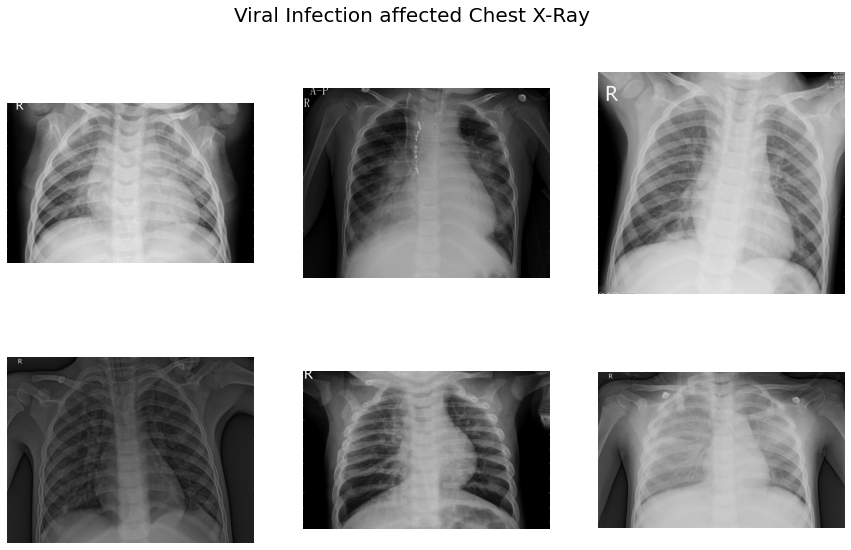

In [36]:
sample_images = random.sample(Vimages,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread(VIR_DIR+sample_images[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('Viral Infection affected Chest X-Ray',fontsize=20)
plt.show()

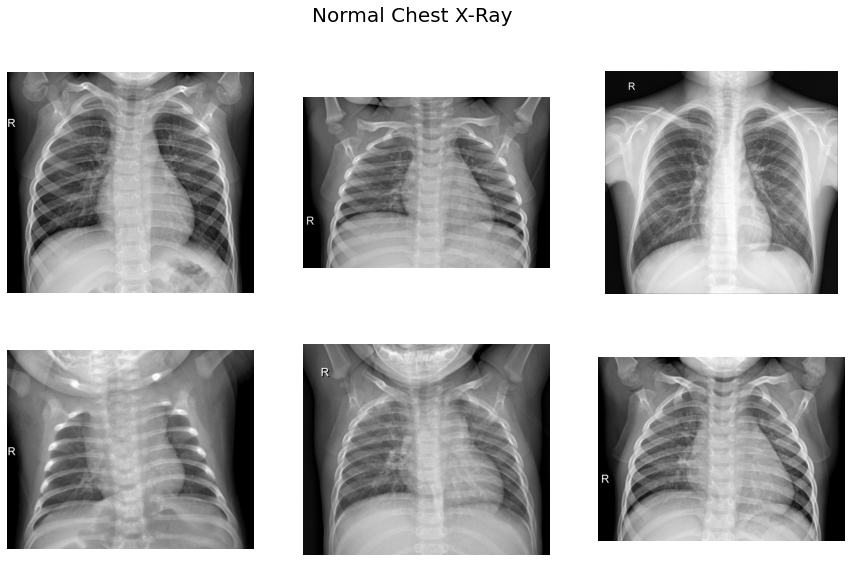

In [37]:
sample_images = random.sample(Nimages,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread(NORM_DIR+sample_images[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('Normal Chest X-Ray',fontsize=20)
plt.show()

### Observation:

From the above sample images we can easily observed that:
- Normal CXR Images have clear lungs.
- Viral Infection CXR Images have slight congestion in lungs
- COVID-19 images have serious congestion in lungs

In [38]:
## Enhancing the CXR Images using White balance and CLAHE

def wb(channel, perc = 0.05):
    mi, ma = (np.percentile(channel, perc), np.percentile(channel,100.0-perc))
    channel = np.uint8(np.clip((channel-mi)*255.0/(ma-mi), 0, 255))
    return channel

## Data preparation

In [39]:
data=[]
labels=[]
Uninfected=os.listdir(NORM_DIR)
for a in Uninfected:
	# extract the class label from the filename
	

	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
	image = cv2.imread(NORM_DIR+a)
	imWB  = np.dstack([wb(channel, 0.05) for channel in cv2.split(image)] )
	gray_image = cv2.cvtColor(imWB, cv2.COLOR_BGR2GRAY)
	clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16, 16))
	img_clahe1 = clahe.apply(gray_image)
	img = cv2.cvtColor(img_clahe1, cv2.COLOR_GRAY2RGB)
	image = cv2.resize(img, (224, 224))

	# update the data and labels lists, respectively
	data.append(image)
	labels.append(0)

Covid=os.listdir(COV_DIR)
for b in Covid:
	# extract the class label from the filename
	

	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
	image = cv2.imread(COV_DIR+b)
	imWB  = np.dstack([wb(channel, 0.05) for channel in cv2.split(image)] )
	gray_image = cv2.cvtColor(imWB, cv2.COLOR_BGR2GRAY)
	clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16, 16))
	img_clahe1 = clahe.apply(gray_image)
	img = cv2.cvtColor(img_clahe1, cv2.COLOR_GRAY2RGB)
	image = cv2.resize(img, (224, 224))
	# update the data and labels lists, respectively
	data.append(image)
	labels.append(1)
 
Virus=os.listdir(VIR_DIR)
for c in Virus:
	# extract the class label from the filename
	

	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
	image = cv2.imread(VIR_DIR+c)
	imWB  = np.dstack([wb(channel, 0.05) for channel in cv2.split(image)] )
	gray_image = cv2.cvtColor(imWB, cv2.COLOR_BGR2GRAY)
	clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16, 16))
	img_clahe1 = clahe.apply(gray_image)
	img = cv2.cvtColor(img_clahe1, cv2.COLOR_GRAY2RGB)
	image = cv2.resize(img, (224, 224))

	# update the data and labels lists, respectively
	data.append(image)
	labels.append(2)

## Image normalization

In [40]:
# data normalization by dividing image pixels by 255
data = np.array(data) / 255.0
labels = np.array(labels)

In [54]:
labels

array([0, 0, 0, ..., 2, 2, 2])

## Train Test Split

In [41]:
from sklearn.model_selection import train_test_split
(trainX, testX, trainY, testY) = train_test_split(data, labels,stratify=labels,
	test_size=0.20,  random_state=42)

In [42]:
trainAug  = ImageDataGenerator(
	rotation_range=15,
	fill_mode="nearest")

## Model Building

In this kernel I will be using Depthwise separable CNNs

In [43]:
inputs = Input(shape=(224, 224,3))
# First conv block
x = Conv2D(filters=4, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
x = Conv2D(filters=4, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = MaxPool2D(pool_size=(2, 2))(x)

# second conv block
x = Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
x = Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = MaxPool2D(pool_size=(2, 2))(x)

# third conv block
x = Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
x = Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = MaxPool2D(pool_size=(2, 2))(x)


# first separable conv block
x = SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)


# second separable conv block
x = SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)


# third separable conv block
x = SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.2)(x)

# fourth separable conv block
x = SeparableConv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.2)(x)


# fifth separable conv block
x = SeparableConv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.2)(x)

# FC layer
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(rate=0.7)(x)
x = Dense(units=128, activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Dense(units=64, activation='relu')(x)
x = Dropout(rate=0.3)(x)
x = Dense(units=32, activation='relu')(x)
x = Dropout(rate=0.3)(x)

# Output layer
output = Dense(units=3, activation='softmax')(x)

# Creating model and compiling
model = Model(inputs=inputs, outputs=output)

EPOCHS = 50
BS = 16


# compile our model
print("[INFO] compiling model...")
opt = "adam"
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
callbacks = [ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True),
             EarlyStopping(monitor='val_loss', patience=5)]
model.summary()

[INFO] compiling model...
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_10 (Conv2D)          (None, 224, 224, 16)      448       
                                                                 
 conv2d_11 (Conv2D)          (None, 224, 224, 16)      2320      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 112, 112, 16)     0         
 g2D)                                                            
                                                                 
 separable_conv2d_10 (Separa  (None, 112, 112, 32)     688       
 bleConv2D)                                                      
                                                                 
 separable_conv2d_11 (Separa  (No

In [44]:
BS = 16
print("[INFO] training head...")
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS,callbacks=callbacks)

[INFO] training head...


C:\Users\isabe\AppData\Local\Temp\ipykernel_43040\2773028250.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(


Epoch 1/50
91/91 [==============================] - 48s 503ms/step - loss: 1.0715 - accuracy: 0.3967 - val_loss: 1.1376 - val_accuracy: 0.2932
Epoch 2/50
91/91 [==============================] - 44s 481ms/step - loss: 0.7307 - accuracy: 0.6893 - val_loss: 1.1408 - val_accuracy: 0.2932
Epoch 3/50
91/91 [==============================] - 43s 471ms/step - loss: 0.5243 - accuracy: 0.8079 - val_loss: 1.1452 - val_accuracy: 0.2932
Epoch 4/50
91/91 [==============================] - 43s 468ms/step - loss: 0.4743 - accuracy: 0.8426 - val_loss: 1.1564 - val_accuracy: 0.3671
Epoch 5/50
91/91 [==============================] - 43s 469ms/step - loss: 0.4468 - accuracy: 0.8481 - val_loss: 1.1106 - val_accuracy: 0.3397
Epoch 6/50
91/91 [==============================] - 43s 473ms/step - loss: 0.3648 - accuracy: 0.8724 - val_loss: 0.9993 - val_accuracy: 0.3397
Epoch 7/50
91/91 [==============================] - 44s 487ms/step - loss: 0.3716 - accuracy: 0.8766 - val_loss: 0.6686 - val_accuracy: 0.6849

## Model Evaluation

In [45]:
## Loading best model based on its weights

from numpy import loadtxt
from tensorflow.keras.models import load_model
model = load_model('.mdl_wts.hdf5')
score = model.evaluate(testX, testY,verbose=1)

print(score)

12/12 [==============================] - 2s 159ms/step - loss: 0.2539 - accuracy: 0.9068
[0.25394129753112793, 0.9068493247032166]


23/23 [==============================] - 2s 98ms/step


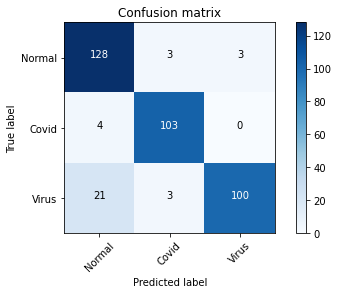

In [46]:
import itertools
pred_Y = model.predict(testX, batch_size = 8, verbose = True)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    target_names =['Normal','Covid','Virus']

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(testX, batch_size=BS)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(pred_Y,axis = 1) 
# Convert validation observations to one hot vectors
# compute the confusion matrix
confusion_mtx = confusion_matrix(testY, Y_pred_classes)

 

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(3)) 

## Classification Report

In [47]:
predIdxs = model.predict(testX, batch_size=BS)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)


# show a nicely formatted classification report
print(classification_report(testY, predIdxs,target_names=['normal','covid','virus']))

23/23 [==============================] - 2s 78ms/step
              precision    recall  f1-score   support

      normal       0.84      0.96      0.89       134
       covid       0.94      0.96      0.95       107
       virus       0.97      0.81      0.88       124

    accuracy                           0.91       365
   macro avg       0.92      0.91      0.91       365
weighted avg       0.91      0.91      0.91       365



## Plotting ROC-AUC Curve

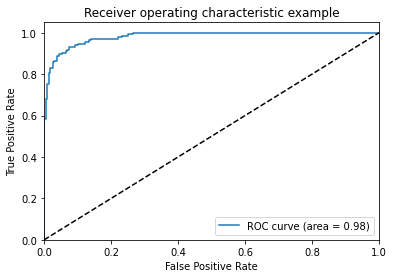

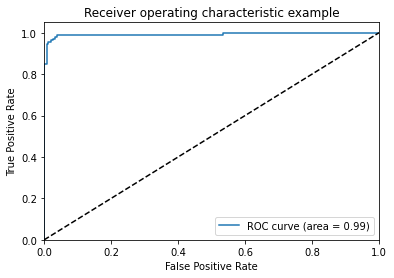

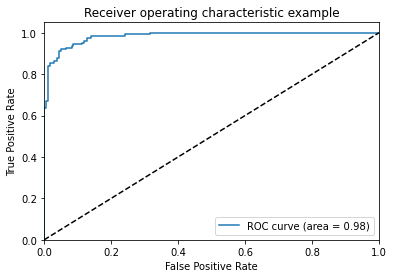

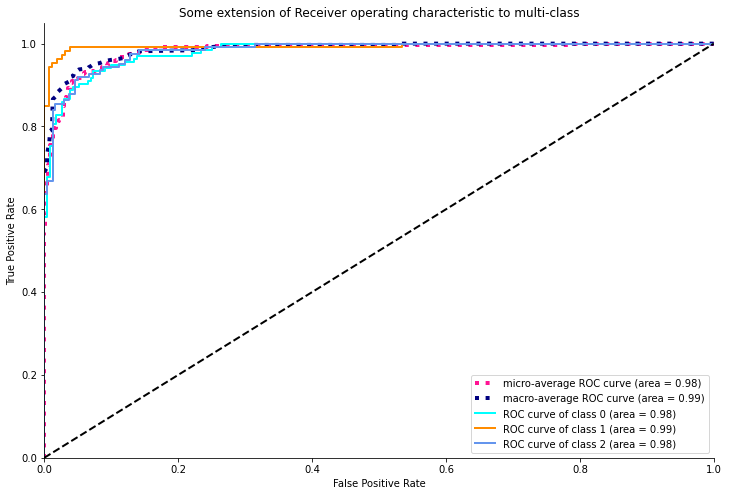

In [48]:
import seaborn as sns
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_test = pd.get_dummies(testY)
y_test = np.array(y_test)

n_classes = 3


# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], pred_Y[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    # Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), pred_Y.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
fig = plt.figure(figsize=(12, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))


plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
sns.despine()
plt.show()

In [55]:
def specificity(y_true, y_pred):
    """
    param:
    y_pred - Predicted labels
    y_true - True labels 
    Returns:
    Specificity score
    """
    neg_y_true = 1 - y_true
    neg_y_pred = 1 - y_pred
    fp = K.sum(neg_y_true * y_pred)
    tn = K.sum(neg_y_true * neg_y_pred)
    specificity = tn / (tn + fp + K.epsilon())
    return specificity

In [56]:
print(specificity(y_test, Y_pred))

tf.Tensor(0.9264253, shape=(), dtype=float32)


## Plotting Model Prediction

In [57]:
# getting predictions on val set.
pred=model.predict(testX, batch_size=BS)
Y_pred_classes=np.argmax(pred,axis=1)

Y_true = np.argmax(testY,axis = 0) 

# Mapping Classes
classes = {0 : 'Normal',
            1 : 'COVID',
            2 : 'Viral'}

23/23 [==============================] - 2s 97ms/step


In [58]:
incorrect = []
for i in range(len(testY)):
    if(not Y_pred_classes[i] == testY[i]):
        incorrect.append(i)
    if(len(incorrect) == 22):
        break

correct = []
for i in range(len(testY)):
    if(Y_pred_classes[i] == testY[i]):
        correct.append(i)
    if(len(correct) == 100):
        break

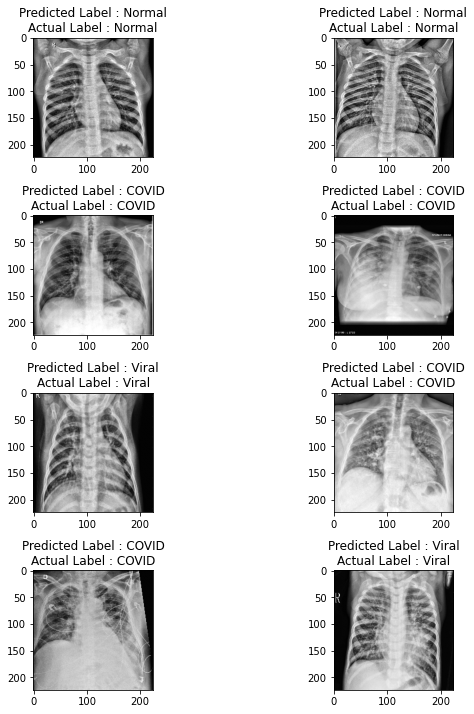

In [59]:
fig, ax = plt.subplots(4,2, figsize=(12,10))
fig.set_size_inches(10,10)
ax[0,0].imshow(testX[correct[0]], cmap='gray')
ax[0,0].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[0]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY[correct[0]]]))

ax[0,1].imshow(testX[correct[1]], cmap='gray')
ax[0,1].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[1]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY[correct[1]]]))
ax[1,0].imshow(testX[correct[2]], cmap='gray')
ax[1,0].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[2]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY[correct[2]]]))
ax[1,1].imshow(testX[correct[3]], cmap='gray')
ax[1,1].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[3]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY[correct[3]]]))
ax[2,0].imshow(testX[correct[4]], cmap='gray')
ax[2,0].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[4]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY[correct[4]]]))
ax[2,1].imshow(testX[correct[5]], cmap='gray')
ax[2,1].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[5]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY[correct[5]]]))
ax[3,0].imshow(testX[correct[6]], cmap='gray')
ax[3,0].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[6]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY[correct[6]]]))
ax[3,1].imshow(testX[correct[7]], cmap='gray')
ax[3,1].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[7]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY[correct[7]]]))
fig.tight_layout(pad=1.0)
plt.show()

## Model Explanation

Analyzing Correct predictions by Model Using LIME

In [61]:
!pip install lime

  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=167a2a36d16a3752fc9274b851f1d340fb8ad38e3d27e50810d48c7d042ba229
  Stored in directory: c:\users\isabe\appdata\local\pip\cache\wheels\ed\d7\c9\5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime


In [62]:
import lime
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

explanation = explainer.explain_instance(testX[correct[5]], model.predict, top_labels=5, hide_color=0, num_samples=100)

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 66ms/step


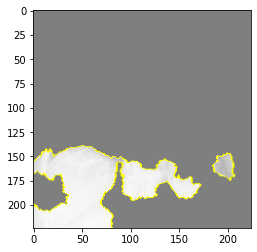

In [63]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

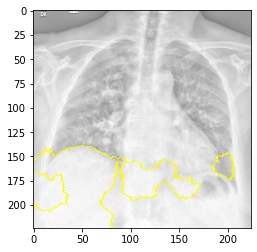

In [64]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

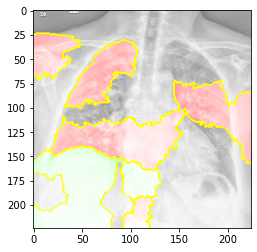

In [65]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

## GradCAM Heatmap

In [66]:
!pip install tf-keras-vis

C:\Users\isabe\AppData\Local\Temp\ipykernel_43040\3412897140.py:18: DeprecationWarning: Call to deprecated class PrintLogger. (Use `Progress` instead.) -- Deprecated since version 0.7.0.
  activation = activation_maximization(loss, callbacks=[Print(interval=100)])


Steps: 100	Scores: [4077.0498046875],	Regularization: [('TotalVariation2D', [12.423404693603516]), ('Norm', [38.48440933227539])]
Steps: 200	Scores: [4566.57861328125],	Regularization: [('TotalVariation2D', [10.133879661560059]), ('Norm', [38.82798767089844])]


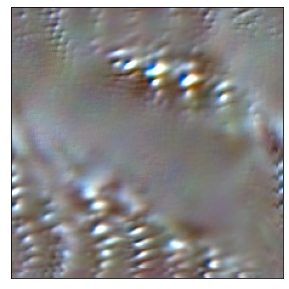

In [87]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tf_keras_vis.activation_maximization import ActivationMaximization
from tf_keras_vis.utils.callbacks import Print

# Define modifier to replace a softmax function of the last layer to a linear function.
def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear

# Create Activation Maximization object
activation_maximization = ActivationMaximization(model, model_modifier)

# Define loss function. 20 is the imagenet index corresponding to ouzel.
loss = lambda x: K.mean(x[:, 1])


# Generate max activation with debug printing
activation = activation_maximization(loss, callbacks=[Print(interval=100)])
#image = np.array(activation[0])  # Convert EagerTensor to NumPy array
image = image.astype(np.uint8)

f, ax = plt.subplots(figsize=(10, 5), subplot_kw={'xticks': [], 'yticks': []})
ax.imshow(image)
plt.show()


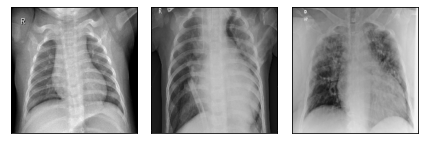

In [88]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing.image import load_img

# Load images
img1 = load_img(NORM_DIR+'NORMAL2-IM-0388-0001.jpeg', target_size=(224, 224))
img2 = load_img(VIR_DIR+'person704_virus_1301.jpeg', target_size=(224, 224))
img3 = load_img(COV_DIR+'covid1900167.png', target_size=(224, 224))

images = np.asarray([np.array(img1), np.array(img2),np.array(img3)])

# Prepare datasets
X = preprocess_input(images)

# Render
subprot_args = {
    'nrows': 1,
    'ncols': 3,
    'figsize': (6, 3),
    'subplot_kw': {'xticks': [], 'yticks': []}
}
f, ax = plt.subplots(**subprot_args)
for i in range(len(images)):
    ax[i].imshow(images[i])
plt.tight_layout()
plt.show()

In [89]:
# Define loss function. 1 is the imagenet index corresponding to Goldfish,
# And 294 is one corresponding to Bear.
def loss(output):
    return (output[1][1], output[0][1])

# Define modifier to replace a softmax function of the last layer to a linear function.
def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear
    return m

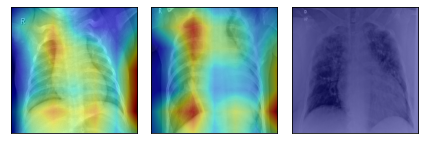

In [90]:
from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils import normalize

# Create Gradcam object
gradcam = Gradcam(model, model_modifier, clone=False)

# Generate heatmap with GradCAM
cam = gradcam(loss, X)
cam = normalize(cam)

f, ax = plt.subplots(**subprot_args)
for i in range(len(cam)):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
plt.tight_layout()
plt.show()

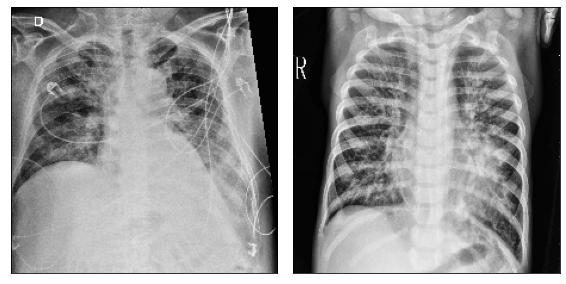

In [91]:
ins = np.asarray([np.array(testX[correct[6]]), np.array(testX[correct[7]])])
S = preprocess_input(images)

# Render
subprot_args = {
    'nrows': 1,
    'ncols': 2,
    'figsize': (8, 4),
    'subplot_kw': {'xticks': [], 'yticks': []}
}
f, ax = plt.subplots(**subprot_args)
for i in range(len(ins)):
    ax[i].imshow(ins[i])
plt.tight_layout()
plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

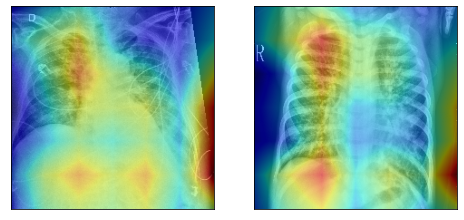

In [94]:
from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils import normalize

# Create Gradcam object
gradcam = Gradcam(model, model_modifier, clone=False)

# Generate heatmap with GradCAM
cam = gradcam(loss, S)
cam = normalize(cam)

f, ax = plt.subplots(**subprot_args)
for i in range(len(cam)):
    #heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    heatmap = np.uint8(cm.jet(cam[i]) * 255)
    ax[i].imshow(ins[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
plt.tight_layout()
plt.show()


## Saliency Maps

IndexError: index 2 is out of bounds for axis 0 with size 2

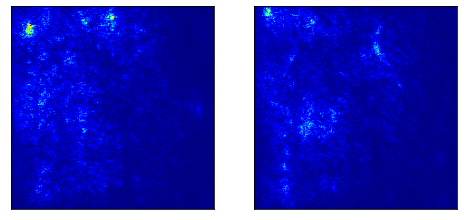

In [95]:
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize

# Create Saliency object
saliency = Saliency(model, model_modifier, clone=False)

# Generate saliency map
saliency_map = saliency(loss, S)
saliency_map = normalize(saliency_map)

f, ax = plt.subplots(**subprot_args)
for i in range(len(saliency_map)):
    ax[i].imshow(saliency_map[i], cmap='jet')
plt.tight_layout()
plt.show()


IndexError: index 2 is out of bounds for axis 0 with size 2

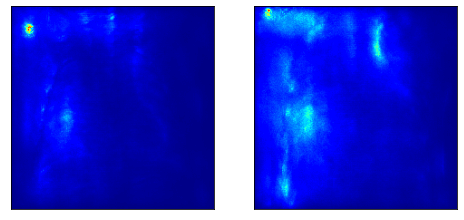

In [96]:
# Generate saliency map with smoothing that reduce noise by adding noise
saliency_map = saliency(loss, S, smooth_samples=100)
saliency_map = normalize(saliency_map)

f, ax = plt.subplots(**subprot_args)
for i in range(len(saliency_map)):
    ax[i].imshow(saliency_map[i], cmap='jet')
plt.tight_layout()
plt.show()
